# Tutorial

In [ ]:
% python3 -m pip install git+https://github.com/treforevans/uci_datasets.git

In [1]:
import wadiroscnn as ws
from uci_datasets import Dataset
import torch
import matplotlib.pyplot as plt

## Define a model and load dataset

In [2]:
data = Dataset("energy")
x_train, y_train, x_test, y_test = data.get_split(split=0)


model = ws.wadiro_scnn()

energy dataset, N=768, d=8


## Train

In [3]:
model.train(x_train, y_train, radius=0.01, bias=True, max_neurons=600, verbose=False, wasserstein="l2")


0.556135897671052

## Get torch model and predict

In [4]:
model_torch = model.get_torch_model(verbose=False)

y_preds_torch = model_torch(torch.tensor(x_test))
y_preds = model.predict_with_sampled_u(x_test, verbose=False)

[[-4.1667e-03 -1.0208e+01  9.8000e+01 -5.4104e+01  1.7500e+00  1.5000e+00
  -1.3438e-01 -8.1250e-01]
 [-1.2417e-01  1.1229e+02  2.4500e+01  4.3896e+01 -1.7500e+00 -5.0000e-01
  -1.3438e-01  1.1875e+00]
 [-2.4167e-02  1.4292e+01 -7.3500e+01  4.3896e+01 -1.7500e+00 -5.0000e-01
   1.6562e-01  2.1875e+00]
 [ 9.5833e-02 -8.3708e+01 -2.4500e+01 -2.9604e+01  1.7500e+00 -5.0000e-01
   1.5625e-02 -8.1250e-01]
 [ 1.3583e-01 -1.0821e+02  0.0000e+00 -5.4104e+01  1.7500e+00 -5.0000e-01
   1.5625e-02 -8.1250e-01]
 [-1.4417e-01  1.3679e+02  4.9000e+01  4.3896e+01 -1.7500e+00  1.5000e+00
   1.6562e-01  2.1875e+00]
 [-7.4167e-02  6.3292e+01 -2.4500e+01  4.3896e+01 -1.7500e+00  5.0000e-01
   1.5625e-02  2.1875e+00]
 [-7.4167e-02  6.3292e+01 -2.4500e+01  4.3896e+01 -1.7500e+00 -5.0000e-01
   1.6562e-01  1.8750e-01]
 [-2.4167e-02  1.4292e+01 -7.3500e+01  4.3896e+01 -1.7500e+00 -5.0000e-01
  -1.3438e-01  1.8750e-01]
 [ 1.3583e-01 -1.0821e+02  0.0000e+00 -5.4104e+01  1.7500e+00  1.5000e+00
  -2.3438e-01 -2.

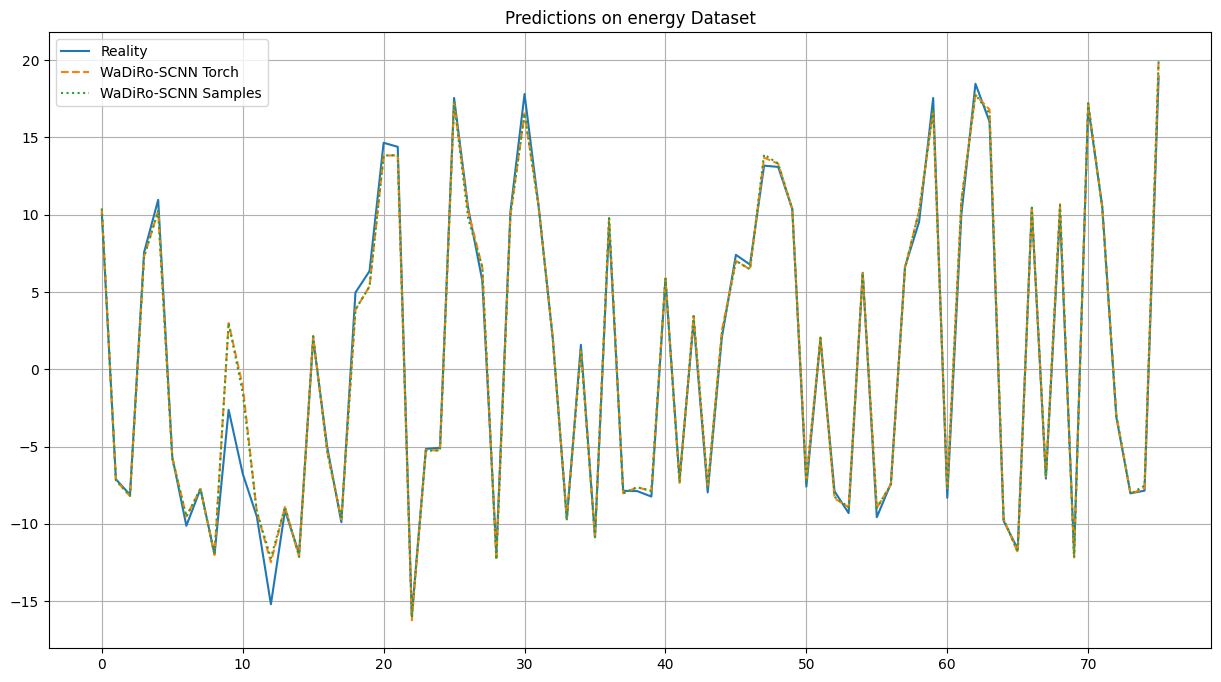

In [8]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label="Reality")
plt.plot(y_preds_torch.detach().numpy(), linestyle="--", label="WaDiRo-SCNN Torch")
plt.plot(y_preds.flatten(), linestyle="dotted", label="WaDiRo-SCNN Samples")
plt.legend()
plt.title("Predictions on energy Dataset")
plt.grid()
plt.show()